In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bitcoin_price_data.csv")
df.head()

,Date,Open,High,Low,Close,percent_change_24h,Volume,Market Cap
0,26-Nov-20,"18,729.84","18,866.29","16,351.03","17,150.62",-8.43,"61,396,835,737","318,231,964,319"
1,25-Nov-20,"19,104.41","19,390.97","18,581.15","18,732.12",-1.95,"43,710,357,371","347,558,803,507"
2,24-Nov-20,"18,365.01","19,348.27","18,128.66","19,107.46",4.04,"51,469,565,009","354,504,361,032"
3,23-Nov-20,"18,370.02","18,711.43","18,000.80","18,364.12",-0.03,"42,741,112,308","340,698,070,308"
4,22-Nov-20,"18,642.23","18,688.97","17,671.38","18,370.00",-1.46,"41,280,434,226","340,790,183,317"


In [2]:
#These steps convert the date column into proper datetime format,
#arrange data in chronological order, set the date as index for time series
#modeling, and check for missing values to ensure clean data.
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.isnull().sum()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14928\3294562949.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Open                     0
High                     0
Low                      0
Close                    0
percent_change_24h    1769
Volume                   0
Market Cap               0
dtype: int64

In [3]:
df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
percent_change_24h    1769
Volume                   0
Market Cap               0
dtype: int64

In [4]:
df = df.drop(columns=['percent_change_24h'])

In [5]:
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-29,134.44,147.49,134,144.54,0,"1,603,768,865"
2013-04-30,144,146.93,134.05,139,0,"1,542,813,125"
2013-05-01,139,139.89,107.72,116.99,0,"1,298,954,594"
2013-05-02,116.38,125.6,92.28,105.21,0,"1,168,517,495"
2013-05-03,106.25,108.13,79.1,97.75,0,"1,085,995,169"
...,...,...,...,...,...,...
2020-11-22,"18,642.23","18,688.97","17,671.38","18,370.00","41,280,434,226","340,790,183,317"
2020-11-23,"18,370.02","18,711.43","18,000.80","18,364.12","42,741,112,308","340,698,070,308"
2020-11-24,"18,365.01","19,348.27","18,128.66","19,107.46","51,469,565,009","354,504,361,032"


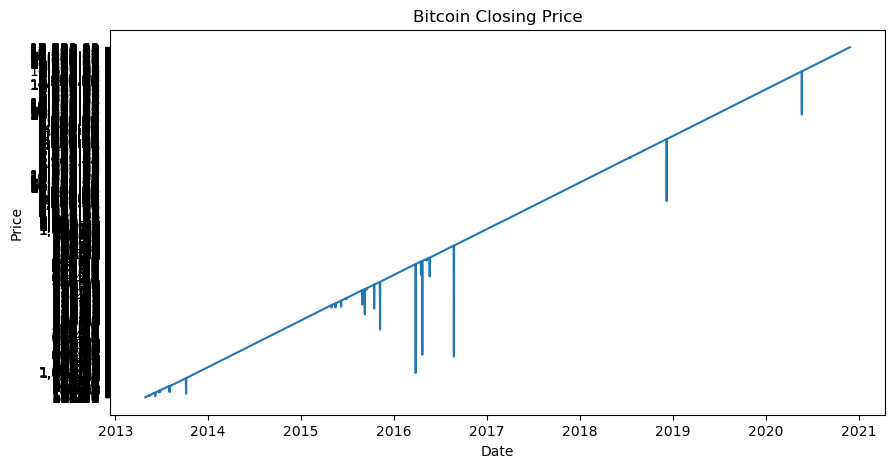

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title("Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [7]:
df[['Close']].head()


,Close
Date,
2013-04-29,144.54
2013-04-30,139
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75


In [8]:
df[['Close']].describe()


,Close
count,2769
unique,2738
top,104
freq,4


In [9]:
df.dtypes


Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [10]:
df['Close'] = (
    df['Close']
    .astype(str)
    .str.replace(',', '', regex=False)
)

df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


In [11]:
df = df.dropna(subset=['Close'])

In [12]:
df['Close'].describe()

count     2769.000000
mean      3901.595782
std       4289.835217
min         68.430000
25%        416.520000
50%       1038.150000
75%       7407.410000
max      19497.400000
Name: Close, dtype: float64

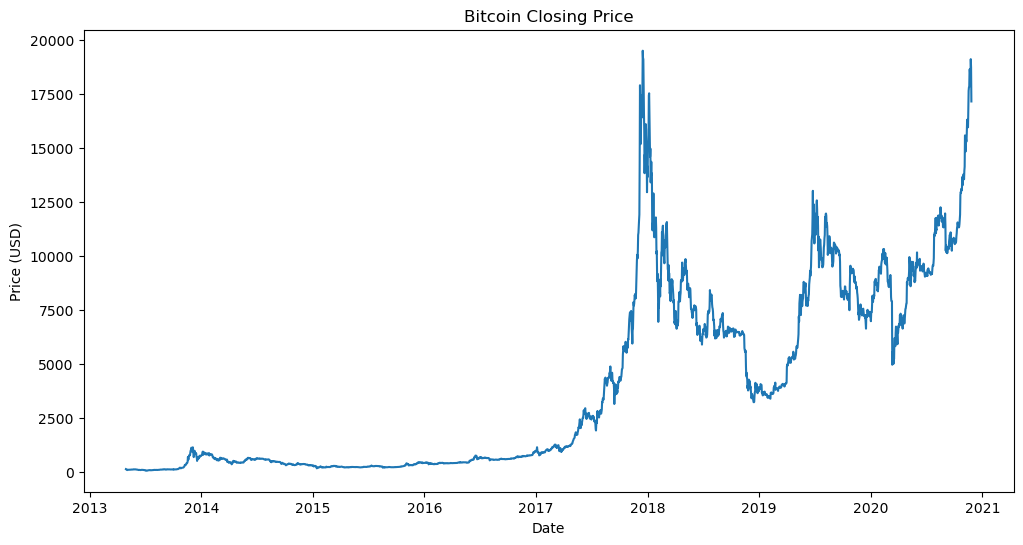

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.title("Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

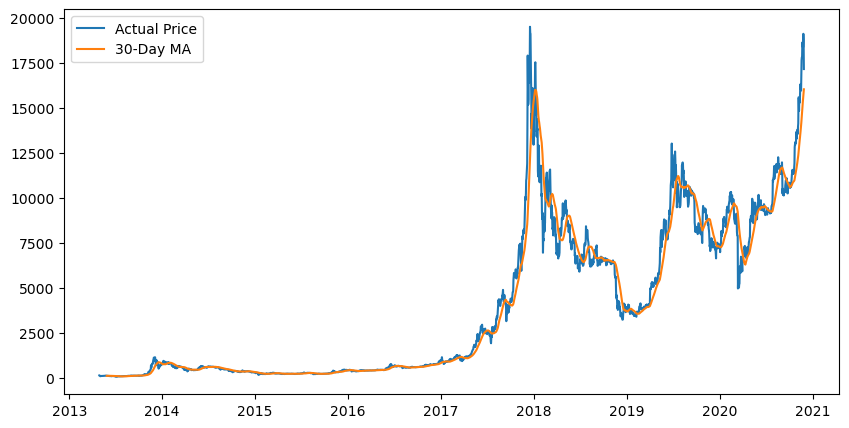

In [14]:
df['MA_30'] = df['Close'].rolling(30).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Actual Price')
plt.plot(df['MA_30'], label='30-Day MA')
plt.legend()
plt.show()


In [15]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [16]:
from sklearn.linear_model import LinearRegression

df['Time'] = range(len(df))
X = df[['Time']]
y = df['Close']

X_train = X.iloc[:-30]
X_test = X.iloc[-30:]
y_train = y.iloc[:-30]
y_test = y.iloc[-30:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [17]:
df.loc[df.index[-30:], 'Regression_Pred'] = y_pred

In [18]:
df.tail(35)

,Open,High,Low,Close,Volume,Market Cap,MA_30,Time,Regression_Pred
Date,,,,,,,,,
2020-10-23,"12,971.55","13,015.96","12,752.65",12931.54,"28,974,975,003","239,557,562,148",11230.283667,2734,NaN
2020-10-24,"12,931.57","13,145.07","12,885.75",13108.06,"24,542,317,940","242,839,876,186",11308.550000,2735,NaN
2020-10-25,"13,108.06","13,329.18","12,910.06",13031.17,"24,406,920,575","241,425,217,440",11386.498333,2736,NaN
2020-10-26,"13,031.20","13,225.30","12,822.38",13075.25,"29,461,458,313","242,250,997,936",11463.982667,2737,NaN
2020-10-27,"13,075.24","13,759.67","13,060.84",13654.22,"33,749,878,156","252,985,946,390",11559.947667,2738,NaN
2020-10-28,"13,654.21","13,837.70","12,932.25",13271.29,"35,867,318,895","245,899,824,465",11645.335667,2739,9611.134994
2020-10-29,"13,271.30","13,612.05","12,980.06",13437.88,"56,499,499,598","248,995,322,466",11731.777000,2740,9615.399474
2020-10-30,"13,437.87","13,651.52","13,136.20",13546.52,"30,581,485,201","251,018,154,920",11823.844667,2741,9619.663953
2020-10-31,"13,546.53","14,028.21","13,457.53",13780.99,"30,306,464,719","255,372,071,116",11929.229333,2742,9623.928433


In [19]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train['Close'], order=(5,1,0))
arima_fit = model_arima.fit()

arima_forecast = arima_fit.forecast(steps=30)


C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
df.loc[df.index[-30:], 'ARIMA_Pred'] = arima_forecast.values

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train['Close'],
                 order=(1,1,1),
                 seasonal_order=(1,1,1,12))
sarima_fit = sarima.fit()

sarima_forecast = sarima_fit.forecast(steps=30)

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
df.loc[df.index[-30:], 'SARIMA_Pred'] = sarima_forecast.values

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_arima = np.sqrt(mean_squared_error(test['Close'], arima_forecast))
rmse_sarima = np.sqrt(mean_squared_error(test['Close'], sarima_forecast))

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_arima = np.sqrt(mean_squared_error(test['Close'], arima_forecast))
rmse_sarima = np.sqrt(mean_squared_error(test['Close'], sarima_forecast))

In [25]:
rmse_arima

np.float64(2959.8031079869)

In [26]:
rmse_sarima

np.float64(2903.6887070691278)

In [27]:
df
df['Close']

Date
2013-04-29      144.54
2013-04-30      139.00
2013-05-01      116.99
2013-05-02      105.21
2013-05-03       97.75
                ...   
2020-11-22    18370.00
2020-11-23    18364.12
2020-11-24    19107.46
2020-11-25    18732.12
2020-11-26    17150.62
Name: Close, Length: 2769, dtype: float64

In [28]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached ml_dtypes-0.5.4-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cac

In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [30]:
close_data = df[['Close']]

In [31]:
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_data)

In [32]:
X = []
y = []

for i in range(60, len(scaled_close)):
    X.append(scaled_close[i-60:i])
    y.append(scaled_close[i])

X = np.array(X)
y = np.array(y)

In [35]:
X_train = X[:-30]
X_test = X[-30:]

y_train = y[:-30]
y_test = y[-30:]

In [36]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50))
model.add(Dense(1))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0062
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0010
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 7.9101e-04
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 7.8687e-04
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 6.7796e-04


In [39]:
lstm_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


In [40]:
lstm_pred = scaler.inverse_transform(lstm_pred)

In [41]:
df.loc[df.index[-30:], 'LSTM_Pred'] = lstm_pred.flatten()

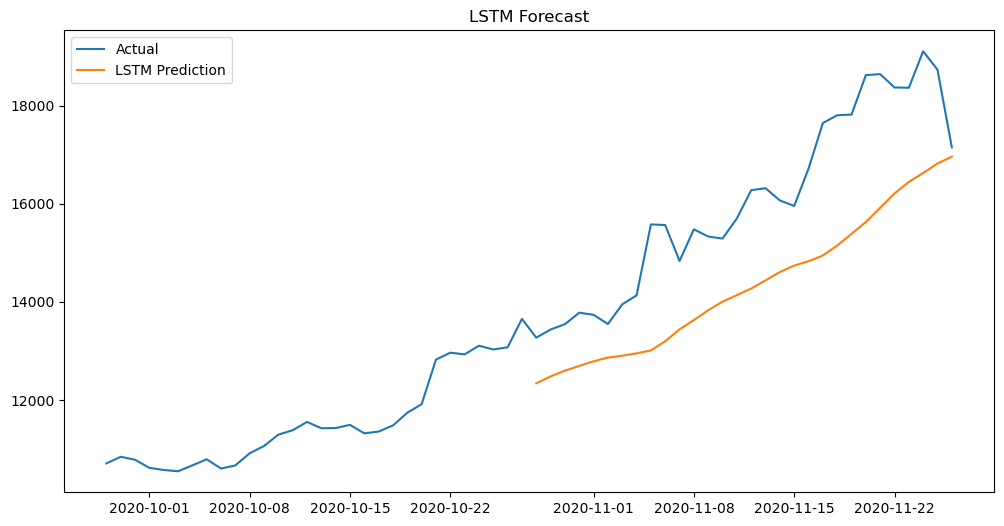

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'].iloc[-60:], label='Actual')
plt.plot(df['LSTM_Pred'].iloc[-30:], label='LSTM Prediction')
plt.legend()
plt.title("LSTM Forecast")
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_pred))

print("LSTM RMSE:", rmse_lstm)

LSTM RMSE: 1836.0872048044846


In [45]:
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'LSTM'],
    'RMSE': [rmse_arima, rmse_sarima, rmse_lstm]
})
comparison


,Model,RMSE
0,ARIMA,2959.803108
1,SARIMA,2903.688707
2,LSTM,1836.087205


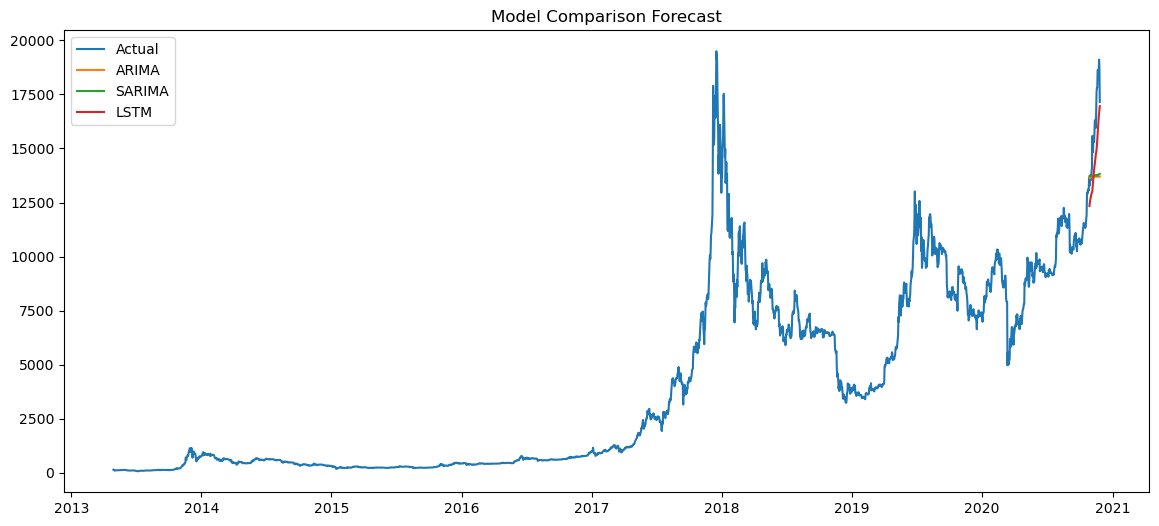

In [46]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Actual')

plt.plot(df['ARIMA_Pred'], label='ARIMA')
plt.plot(df['SARIMA_Pred'], label='SARIMA')
plt.plot(df['LSTM_Pred'], label='LSTM')

plt.legend()
plt.title("Model Comparison Forecast")
plt.show()

In [47]:
final_df = df[['Close', 'ARIMA_Pred', 'SARIMA_Pred', 'LSTM_Pred']]
final_df.to_csv("crypto_forecast_final.csv")

In [48]:
final_df.tail(35)

,Close,ARIMA_Pred,SARIMA_Pred,LSTM_Pred
Date,,,,
2020-10-23,12931.54,NaN,NaN,NaN
2020-10-24,13108.06,NaN,NaN,NaN
2020-10-25,13031.17,NaN,NaN,NaN
2020-10-26,13075.25,NaN,NaN,NaN
2020-10-27,13654.22,NaN,NaN,NaN
2020-10-28,13271.29,13657.515619,13714.470856,12341.339844
2020-10-29,13437.88,13671.617496,13715.364056,12482.332031
2020-10-30,13546.52,13658.149095,13732.055336,12598.970703
2020-10-31,13780.99,13645.716369,13729.982451,12696.006836


In [50]:
[col for col in df.columns if 'Pred' in col]

['Regression_Pred', 'ARIMA_Pred', 'SARIMA_Pred', 'LSTM_Pred']

In [51]:
len(df['ARIMA_Pred'].dropna()),
len(df['SARIMA_Pred'].dropna()),
len(df['LSTM_Pred'].dropna())

30

In [52]:
df[['Close','ARIMA_Pred','SARIMA_Pred','LSTM_Pred']].tail(10)

,Close,ARIMA_Pred,SARIMA_Pred,LSTM_Pred
Date,,,,
2020-11-17,17645.41,13697.912487,13761.547136,14946.817383
2020-11-18,17804.01,13697.914425,13765.280451,15147.793945
2020-11-19,17817.09,13697.915074,13749.272572,15386.881836
2020-11-20,18621.31,13697.911103,13735.766238,15627.754883
2020-11-21,18642.23,13697.913340,13780.110667,15919.794922
2020-11-22,18370.00,13697.913471,13790.136466,16209.619141
2020-11-23,18364.12,13697.913652,13802.690949,16445.388672
2020-11-24,19107.46,13697.913796,13810.822494,16626.091797
2020-11-25,18732.12,13697.913395,13827.726787,16820.080078
